---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$)
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=(1-\delta)k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

$\beta = \frac{1}{1+0.04} \approx 0.96$

$\delta \approx 0.046$

$g = 1.002$ (France)

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

$\hat{k}_t = (1-\delta) \frac{1}{g} \hat{k}_{t-1} +\frac{1}{g} \hat{i}_{t-1}$

$ \hat{y}_t =  \hat{k}_t ^{\alpha} $

$ \hat{y}_t = \hat{c}_t + \hat{i}_t $

Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

In [4]:
function f(k::Float64, p::Dict{Symbol, Float64})
    y = k^(p[:α])
    i = p[:s]*y
    res = k*(1-p[:δ])/p[:g] + i/p[:g]
    return res
end

f (generic function with 1 method)

$k = (1-\delta)/g$ k^

In [134]:
p = Dict(:α=>0.6, :β=>0.96, :δ=>0.046, :g=>1.002, :s=>0.2 )

Dict{Symbol, Float64} with 5 entries:
  :α => 0.6
  :s => 0.2
  :δ => 0.046
  :g => 1.002
  :β => 0.96

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

In [135]:
k = [10.0]
for i = 1:5000
    append!(k, f(last(k), p))
end


In [136]:
last(k)

35.43821965832084

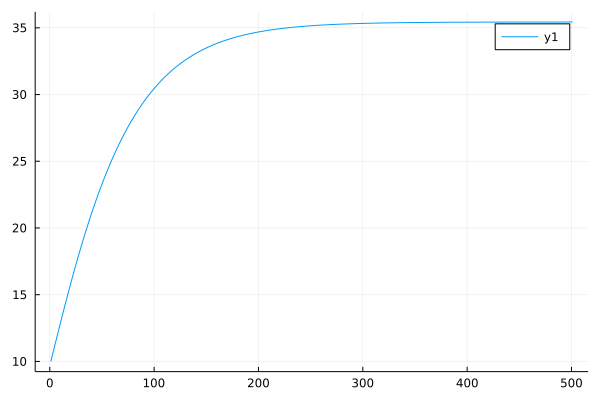

In [126]:
import Plots: plot, plot!
using Plots

plot(k)

__What factors affect the steady-state level of capital?__

Factors that affect the steady state of capital are $\alpha$, $\delta$, $g$ and $s$.

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

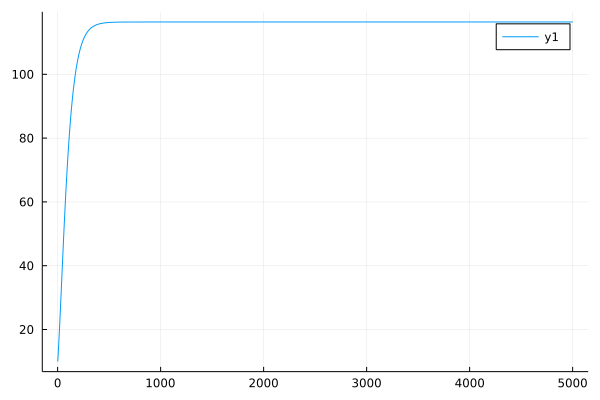

In [133]:
p = Dict(:α=>0.7, :β=>0.96, :δ=>0.046, :g=>1.002, :s=>0.2 )
k = [10.0]
for i = 1:5000
    append!(k, f(last(k), p))
end

plot(k)

Initial $k_0$ close to the steady state speeds up the convergence towards the steady-state.
Higher $\alpha$, as well as higher $\beta$ decrease speed of converges towards the steady-state.
Higher $\delta$ increases speed of convergence.

__Compute the steady-state directly using a Newton method and compare convergence speed.__

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

In [5]:
maxk = 0
maxs = 0
for j in 1:100
    p = Dict(:α=>0.7, :β=>0.96, :δ=>0.046, :g=>1.002, :s=>j/100 )
    k = [10.0]
    for i = 1:5000
        append!(k, f(last(k), p))
    end
    if maxk < last(k)
        maxk = last(k)
        maxs = p[:s]
    end
end


In [6]:
maxk, maxs

(24880.696983014095, 1.0)

To maximise steady-state capital we should choose $s=1$, which means that all output is invested into new capital.

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__

